## **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

Nama : Alfan Olivan

NIM : 2141720078

## **Praktikum**

1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

2. Konvolusi tanpa library

In [2]:
def convolution2d(image, kernel, stride, padding):
  # Penambahan padding ke citra asli
  # Jika padding lebih dari 0, tambahkan padding ke citra.
    # Padding berfungsi untuk mempertahankan ukuran citra atau mengatur dimensi output setelah konvolusi.
    if padding > 0:
      # Membuat citra dengan padding (bernilai nol) berdasarkan ukuran padding yang diberikan.
        image_padded = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))

        # Menempatkan citra asli ke citra dengan padding
        image_padded[padding:-padding, padding:-padding] = image
    else:
       # Jika tidak ada padding, gunakan citra asli
        image_padded = image

    # Membuat citra keluaran dengan dimensi yang sesuai
    output_height = int((image_padded.shape[0] - kernel.shape[0])/stride) + 1
    output_width = int((image_padded.shape[1] - kernel.shape[1])/stride) + 1
    output = np.zeros((output_height, output_width))

    # Melakukan konvolusi
    for x in range(0, image_padded.shape[1] - kernel.shape[1] + 1, stride):
        for y in range(0, image_padded.shape[0] - kernel.shape[0] + 1, stride):
          # Mengalikan elemen dari bagian citra dengan kernel dan menjumlahkannya
            # Hasilnya ditempatkan pada matriks output
            output[y//stride, x//stride] = np.sum(image_padded[y:y+kernel.shape[0], x:x+kernel.shape[1]] * kernel)

    return output


3. Load Image

In [3]:
# Load Image
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

4. Operasi Sharpen

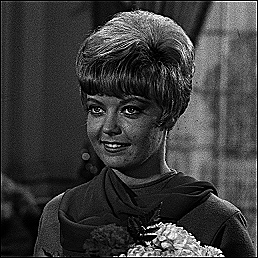

In [4]:
# Operasi Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

5. Operasi Emboss

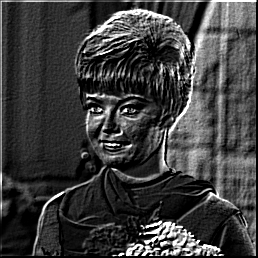

In [6]:
# Operasi Embos
kernel_sharpen = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

6. Operasi Left Sobel Edge Detection

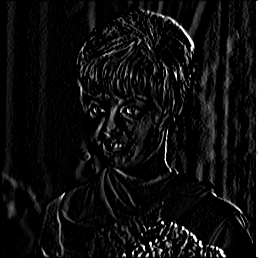

In [7]:
# Operasi Left Sobel Edge Detection
kernel_sharpen = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

7. Canny Edge Detection

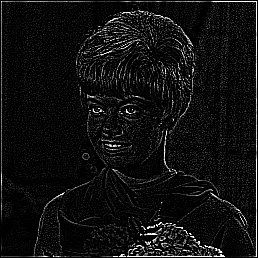

In [8]:
# Canny Edge Detection
kernel_sharpen = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

8. Operasi Prewitt Edge Detection

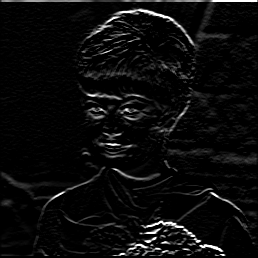

In [9]:
# Operasi Prewitt Edge Detection
kernel_sharpen = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

9. Operasi 5x5 Gaussian Blur

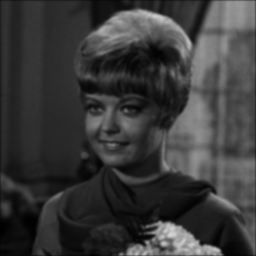

In [13]:
# Operasi 5x5 Gaussian Blur
a = 1/256
b = np.array([[1,4,6,4,1],
              [4,16,24,16,4],
              [6,24,36,24,6],
              [4,16,24,16,4],
              [1,4,6,4,1]])

kernel_sharpen = np.dot(a,b)

output = convolution2d(img_gray,kernel_sharpen,1,2)


cv2_imshow(output)

10. Operasi 21x21 Gaussian Blur

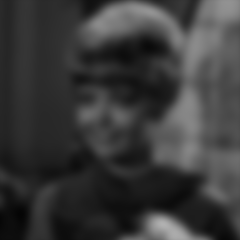

In [14]:
# Operasi 21x21 Gaussian Blur

kernel_size = 21

sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

output = convolution2d(img_gray,gauss_kernel,1,2)


cv2_imshow(output)

## **Tugas**



Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui
implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan
operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

1. Load Image

In [16]:
ktp1 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp.png')
ktp2 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp1.png')
ktp3 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp2.png')
ktp4 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp4.png')
ktp5 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp5.png')
ktp6 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp6.png')
ktp7 = cv.imread('/content/drive/MyDrive/PCVK/KTP/ktp7.jpeg')

2. Perbaikan gambar

In [37]:
def sharpen_image(image):
    # Convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply the Laplacian filter for edge detection
    laplacian = cv.Laplacian(gray_image, cv.CV_64F)

    # Enhance edges by adding the Laplacian to the original image
    sharpened = cv.convertScaleAbs(image, alpha=1.25, beta=0)

    return sharpened

In [26]:
# Define a function for edge detection
def apply_edge_detection(image):
    # Convert the image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv.Canny(gray_image, threshold1=30, threshold2=100)  # You can adjust the thresholds as needed

    return edges

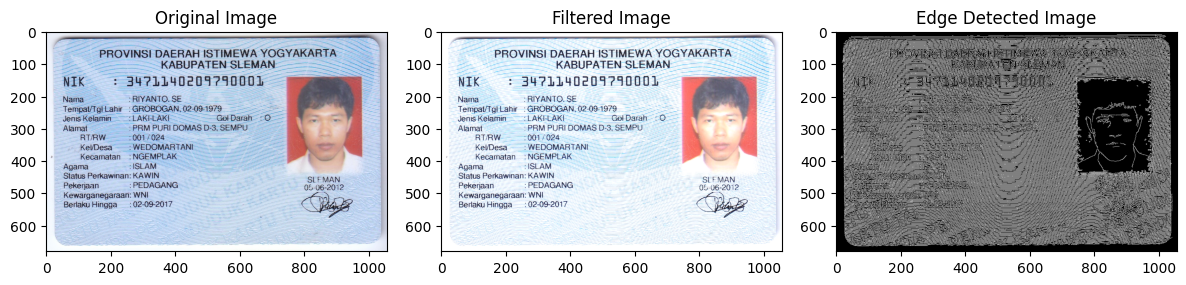

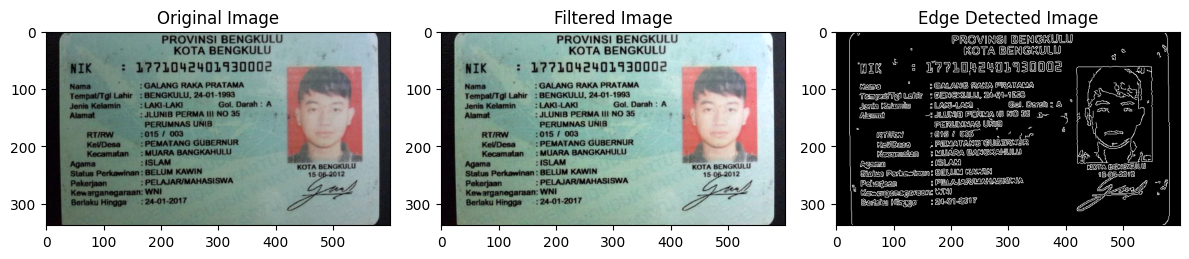

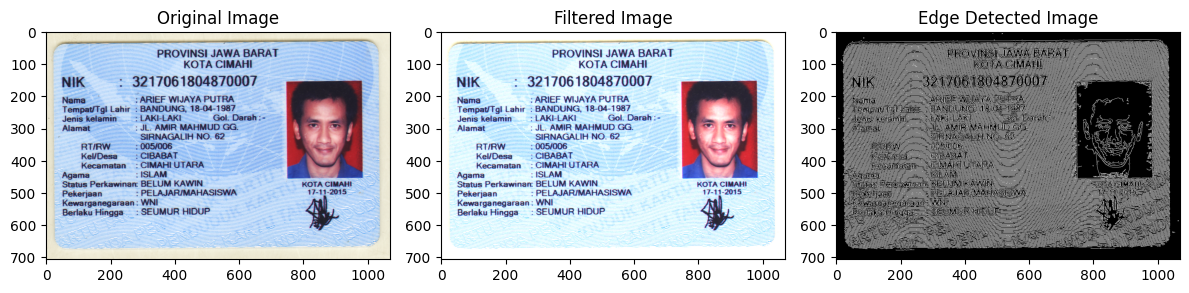

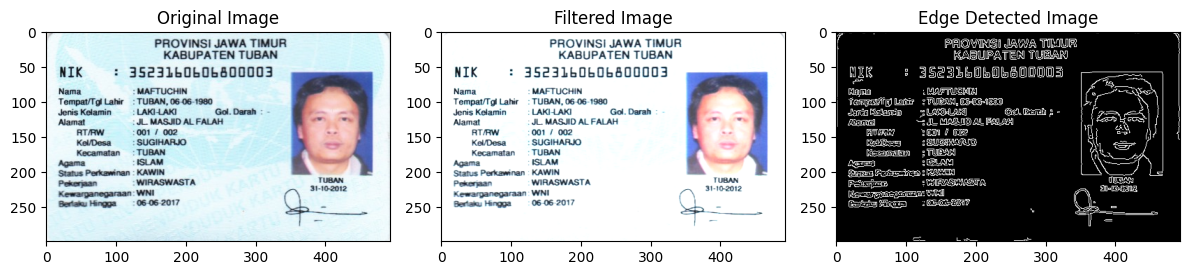

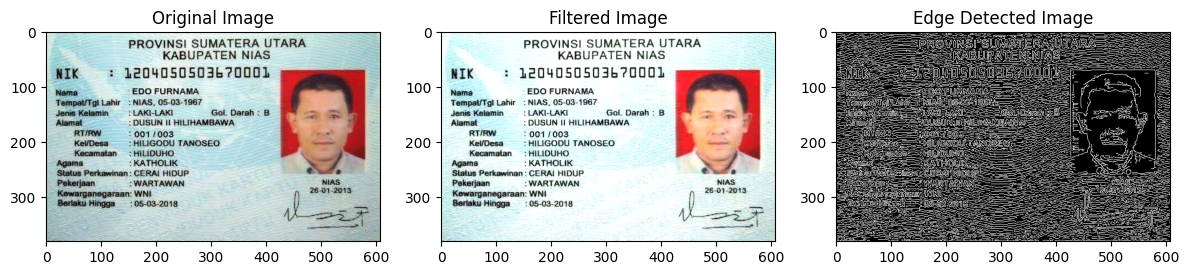

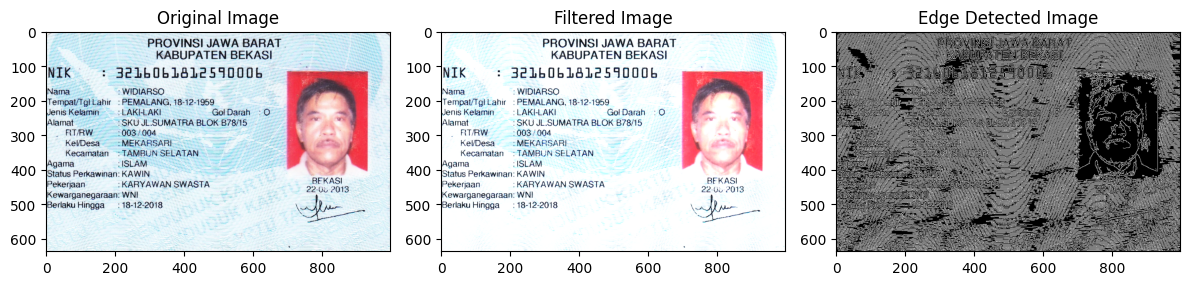

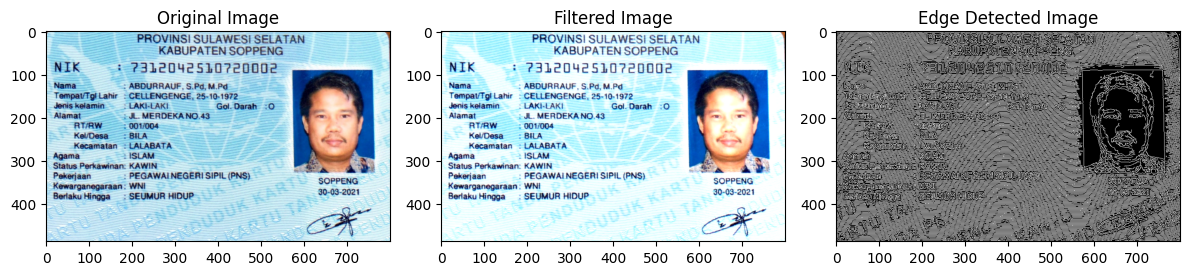

In [38]:
images = [ktp1, ktp2, ktp3, ktp4, ktp5, ktp6, ktp7]

for i, image in enumerate(images):
    # Apply filtration
    filtered_image = sharpen_image(image)
    cv.imwrite(f'filtered_image_{i}.png', filtered_image)

    # Apply detection
    edges = apply_edge_detection(image)
    cv.imwrite(f'edges_image_{i}.png', edges)

    # Display the images using plt
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title('Filtered Image')
    plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

    plt.subplot(1, 3, 3)
    plt.title('Edge Detected Image')
    plt.imshow(edges, cmap='gray')

    plt.tight_layout()
    plt.show()